# GRO620 - Activité procédurale 1

In [50]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Acquisition

### Q1.1

À partir de la figure 2.23 du livre de référence, décrivez en une phrase le rôle de chacune des étapes de la chaîne d'acquisition d'images numériques.

*(réponse ici)*

## Repères et coordonnées

### Q2.1

Supposons ces 2 repères :

![](images_doc/proc1-q2_1-frames.png)

**a)** Trouvez la matrice homogène permettant de transformer un point du repère $\{1\}$ au repère $\{0\}$.

In [51]:
T_10 = np.identity(4) # Génère une matrice identité 4x4
print("T_10:\n", T_10)

T_10:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


**b)** Trouvez maintenant la transformation inverse.

In [52]:
T_01 = np.identity(4)

## Encodage de l'image

Pour les questions suivantes, vous aurez probablement besoin de lire la documentation de cv2.imread et matplotlib.pyplot.imshow :

[imread](https://pythonexamples.org/python-opencv-read-image-cv2-imread/)

[imshow](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html)

Le code suivant charge une image et l'affiche en ligne :

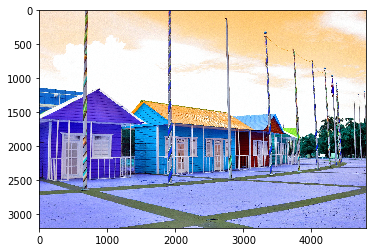

In [53]:
img_color = cv2.imread("images_doc/proc1-q3-color.jpeg")
plt.imshow(img_color)

(source de l'image: [Pexels](https://www.pexels.com/photo/apartment-architecture-block-blue-534124/))

### Q3.1

**a)** Ouvrez directement l'image dans le dossier et comparez le résultat. Que remarquez vous ?

(réponse ici)

**b)** Affichez seulement le premier canal de couleurs de l'image. Pensez à analyser la composition de la matrice image que OpenCV vous retourne. Expliquez ensuite ce que vous voyez.

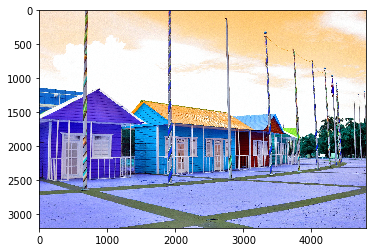

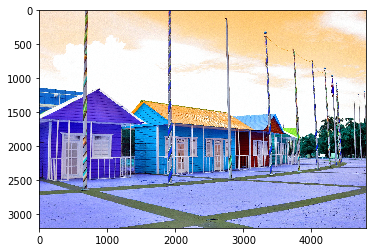

In [54]:
plt.imshow(img_color)              # Image originale
plt.figure()                       # Permet d'afficher plus d'une image dans la même cellule
plt.imshow(img_color, cmap="gray") # Le paramètre cmap n'a pas d'effet sur une image à plus d'un canal.

**c)** Transformez maintenant l'image pour que les couleurs correspondent à ce que vous voyez en dehors de Jupyter.

In [55]:
img_correcte = img_color.copy() # Permet de forcer une copie de l'image.
                                # img_correcte = img_color aurait modifié l'originale.
# ...

## Reprojection 2D à 3D